In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

health_data = pd.read_csv('diabetes.csv')
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
end_result=health_data.Outcome
health_factors=health_data.drop(columns={"Outcome"},inplace=False)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
zscore = ss.fit_transform(health_factors)
health_factors_normalized = pd.DataFrame(zscore, columns=health_factors.columns.tolist())
health_factors_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(health_factors_normalized, end_result, random_state=0)


In [6]:
from sklearn import svm #Import svm model
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix


In [7]:
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC(random_state=0) 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
param_grid_1 = {'C': [1], 
              'gamma': ["scale"],
              'kernel': ['rbf']}   

grid = GridSearchCV(ml, param_grid_1, refit = True, verbose = 1,cv=15)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 150 folds for each of 1 candidates, totalling 150 fits


In [8]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [9]:
y_test_hat=grid.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 77.60%


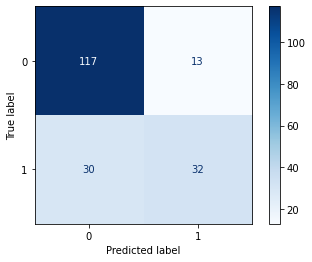

In [10]:
confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)

In [11]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=2, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8020833333333334

In [12]:
log_predict=clf.predict(X_test)
confusion_matrix(y_test,log_predict)

array([[118,  12],
       [ 26,  36]], dtype=int64)